# Evolocity of cytochrome c

Here we will analyze cytochrome c sequences from eukaryotes as obtained from [UniProt](https://www.uniprot.org/). Also, see our tutorial walking through how to perform evolocity analysis on [influenza A nucleoprotein](https://colab.research.google.com/drive/143vxIqgIO1bWbC1FJ0q_Ja8eZN603uwM?usp=sharing). This tutorial is also available on [Colab](https://colab.research.google.com/drive/1Eav24ijOnT5JWRNWan4iuhnMfu_WpZE4?usp=sharing).

First, we need to install the required packages:

In [ ]:
!pip install scanpy evolocity

Now we need to import the packages:

In [2]:
import evolocity as evo
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import seaborn as sns

And now we can download the data for cytochrome c.

We have already computed the language model embeddings for these sequences and also parsed the metadata in the `'tax_group'` entry in `adata.obs`. We have also constructed the nearest neighbors graph and run the UMAP algorithm to embed the graph into two dimensions.

In [ ]:
adata = evo.datasets.cytochrome_c()
adata

Now, we can plot the graph in UMAP space colored by taxonomy.

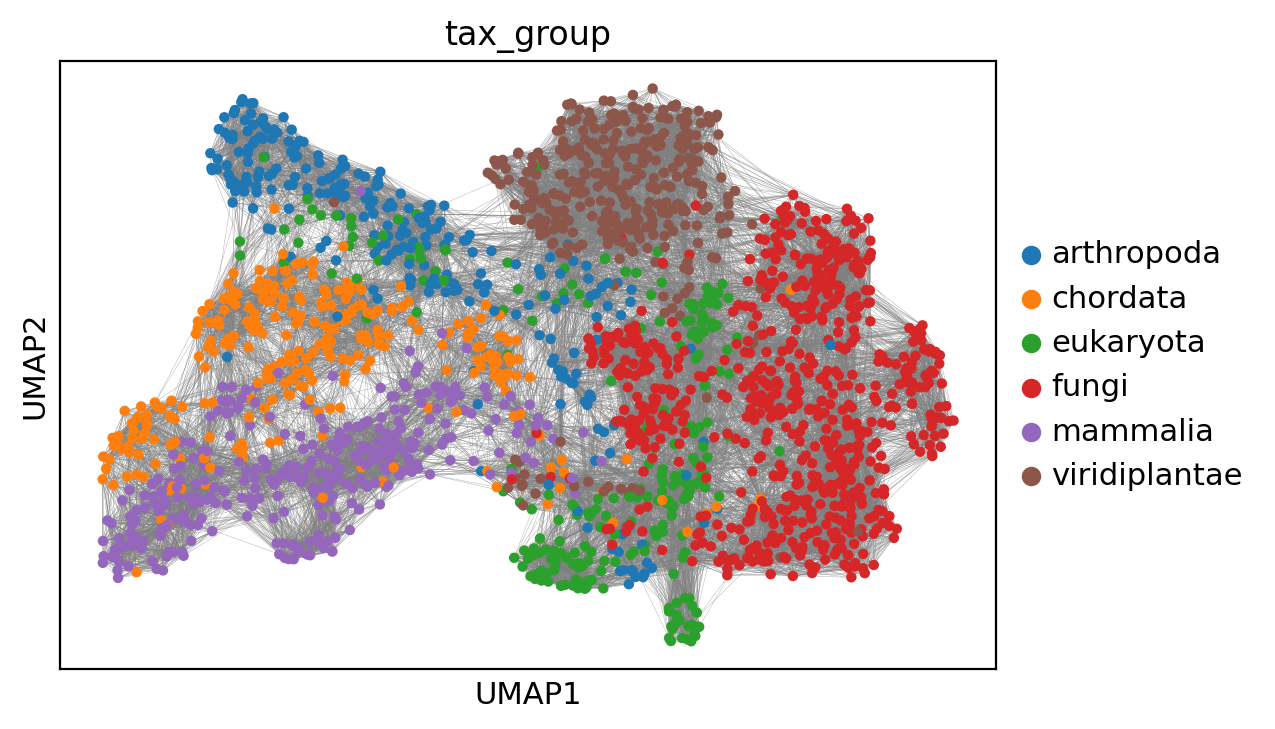

In [4]:
evo.set_figure_params(dpi_save=500, figsize=(6, 4))
sc.pl.umap(adata, color='tax_group', edges=True,)

Now we need to install ESM-1b so we can compute the velocity scores

In [ ]:
!pip install fair-esm

Now we can compute the velocity scores for each edge in the sequence landscape. Downloading the model can take up to 25 minutes. Computing the likelihoods **with GPU acceleration** takes around 2 minutes and computing the velocity scores also takes around 2 minutes.

In [ ]:
evo.tl.velocity_graph(adata)

Now, we can project the velocities into two-dimensional UMAP space and then visualize the velocities as a streamplot:

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


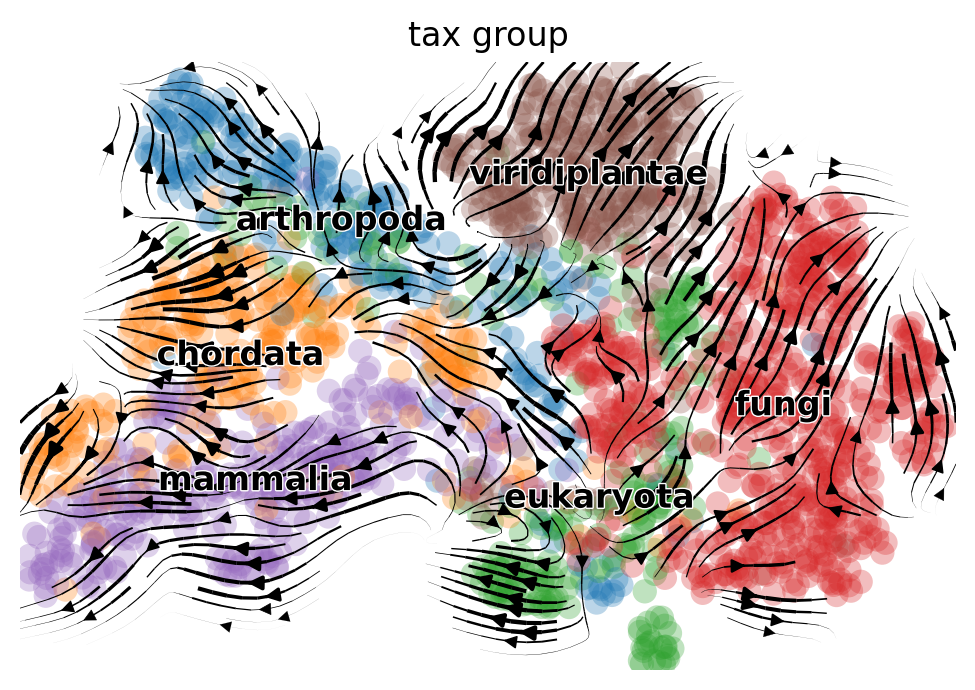

In [30]:
evo.tl.velocity_embedding(adata, basis='umap', scale=1.)
evo.pl.velocity_embedding_stream(
    adata, basis='umap', min_mass=1., smooth=1., linewidth=1.,
    color='tax_group',
)